要运行此操作，请按“*Runtime*”，然后按“*运行*” ** free ** tesla Tesla T4 Google COLAB实例！
<div class =“ Align-Center”>
<a href =“ https://unsloth.ai/”> <img src =“ https://github.com/unslothai/unslothai/unsloth/raw/raw/main/main/mains/unsloth%20new%20new%20logo.png.png”
<a href =“ https://discord.gg/unsloth”> <img src =“ https://github.com/unslothai/unslothai/unsloth/raw/main/main/main/images/images/discord button.png button.png
<a href =“ https://docs.unsloth.ai/”> <img src =“ https://github.com/unslothai/unslothai/unsloth/unsloth/main/main/main/mains/images/documentation%20green%20green%20breen%20button.png?png?raw=raw=true width width” <i>在<a href =“ https://github.com/unslothai/unsloth”> github </a> </i>⭐中
</div>

要在您自己的计算机上安装不塞，请按照我们的github页面上的安装说明[here](https://docs.unsloth.ai/get-started/installing-+-updating)上的安装说明。

您将学习如何做[data prep](#Data)，如何[train](#Train)，如何[run the model](#Inference)，＆xx_markDown_link_xx


### 消息

** New ** Unsploth现在支持培训OpenAi的新** GPT-oss **模型！您可以通过我们的** [Colab notebook](https://x.com/UnslothAI/status/1953896997867729075)免费启动Finetune GPT-oss **！

Unsploth现在支持文本对语音（TTS）模型。阅读我们的xx_markDown_link_xx。

阅读我们的** [guide here](https://docs.unsloth.ai/basics/text-to-speech-tts-fine-tuning) **并查看我们的新** [Gemma 3N Guide](https://docs.unsloth.ai/basics/gemma-3n-how-to-run-and-fine-tune) ** Quants优先量优于其他量化方法！

请访问我们的所有文档，以获取我们的所有XX_MarkDown_link_xx和[Dynamic 2.0](https://docs.unsloth.ai/basics/unsloth-dynamic-2.0-ggufs)。


### 安装

In [ ]:
%%capture
import os
if "COLAB_" not in "".join(os.environ.keys()):
    !pip install unsloth
else:
    #  Do this only in Colab notebooks! Otherwise use pip install unsloth
    !pip install --no-deps bitsandbytes accelerate xformers==0.0.29.post3 peft trl triton cut_cross_entropy unsloth_zoo
    !pip install sentencepiece protobuf "datasets>=3.4.1,<4.0.0" "huggingface_hub>=0.34.0" hf_transfer
    !pip install --no-deps unsloth

### 不塞

In [2]:
from unsloth import FastVisionModel # LLMS的FastLanguageModel
import torch

# 4位预量化模型我们支持4倍下载 + no ooms。
fourbit_models = [
    "unsloth/Llama-3.2-11B-Vision-Instruct-bnb-4bit", # Llama 3.2视力支持
    "unsloth/Llama-3.2-11B-Vision-bnb-4bit",
    "unsloth/Llama-3.2-90B-Vision-Instruct-bnb-4bit", # 可以适合80GB卡！
    "unsloth/Llama-3.2-90B-Vision-bnb-4bit",

    "unsloth/Pixtral-12B-2409-bnb-4bit",              # PixTral适合16GB！
    "unsloth/Pixtral-12B-Base-2409-bnb-4bit",         # PixTral基本模型

    "unsloth/Qwen2-VL-2B-Instruct-bnb-4bit",          # QWEN2 VL支持
    "unsloth/Qwen2-VL-7B-Instruct-bnb-4bit",
    "unsloth/Qwen2-VL-72B-Instruct-bnb-4bit",

    "unsloth/llava-v1.6-mistral-7b-hf-bnb-4bit",      # 任何Llava变体都可以使用！
    "unsloth/llava-1.5-7b-hf-bnb-4bit",
] # https://huggingface.co/unsloth的更多型号

model, tokenizer = FastVisionModel.from_pretrained(
    "unsloth/Qwen2.5-VL-7B-Instruct-bnb-4bit",
    load_in_4bit = True, # 使用4位减少内存使用。为16位洛拉的假。
    use_gradient_checkpointing = "unsloth", # 漫长的上下文真实或“不舒服”
)

🦥 Unsloth: Will patch your computer to enable 2x faster free finetuning.
🦥 Unsloth Zoo will now patch everything to make training faster!
==((====))==  Unsloth 2025.3.19: Fast Qwen2_5_Vl patching. Transformers: 4.50.0.
   \\   /|    Tesla T4. Num GPUs = 1. Max memory: 14.741 GB. Platform: Linux.
O^O/ \_/ \    Torch: 2.6.0+cu124. CUDA: 7.5. CUDA Toolkit: 12.4. Triton: 3.2.0
\        /    Bfloat16 = FALSE. FA [Xformers = 0.0.29.post3. FA2 = False]
 "-____-"     Free license: http://github.com/unslothai/unsloth
Unsloth: Fast downloading is enabled - ignore downloading bars which are red colored!


model.safetensors:   0%|          | 0.00/5.97G [00:00<?, ?B/s]

generation_config.json:   0%|          | 0.00/267 [00:00<?, ?B/s]

preprocessor_config.json:   0%|          | 0.00/575 [00:00<?, ?B/s]

Using a slow image processor as `use_fast` is unset and a slow processor was saved with this model. `use_fast=True` will be the default behavior in v4.50, even if the model was saved with a slow processor. This will result in minor differences in outputs. You'll still be able to use a slow processor with `use_fast=False`.


tokenizer_config.json:   0%|          | 0.00/7.33k [00:00<?, ?B/s]

vocab.json:   0%|          | 0.00/2.78M [00:00<?, ?B/s]

merges.txt:   0%|          | 0.00/1.67M [00:00<?, ?B/s]

tokenizer.json:   0%|          | 0.00/11.4M [00:00<?, ?B/s]

added_tokens.json:   0%|          | 0.00/605 [00:00<?, ?B/s]

special_tokens_map.json:   0%|          | 0.00/614 [00:00<?, ?B/s]

chat_template.json:   0%|          | 0.00/1.05k [00:00<?, ?B/s]

现在，我们为参数有效的芬特添加LORA适配器 - 这使我们只能有效地训练所有参数的1％。

** [new] **我们还仅支持FINETUNTUNENETINTUNT，或仅对模型的视觉部分或语言部分。或者您可以选择两者！您还可以选择以捕捉注意力或MLP层！

In [3]:
model = FastVisionModel.get_peft_model(
    model,
    finetune_vision_layers     = True, # 虚假的即使没有填充视觉层
    finetune_language_layers   = True, # 假语言层（假语言层）
    finetune_attention_modules = True, # 虚假的话，如果不迎接注意力层
    finetune_mlp_modules       = True, # 错误的如果不易经的MLP层

    r = 16,           # 越大，准确性越高，但可能过度合适
    lora_alpha = 16,  # 推荐的alpha == r至少
    lora_dropout = 0,
    bias = "none",
    random_state = 3407,
    use_rslora = False,  # 我们支持排名稳定的洛拉
    loftq_config = None, # 和Loftq
    # target_modules =“ all-linear”，＃现在可选！如果需要，可以指定列表
)

<a name =“ data”> </a>
###数据准备
我们将使用手写数学公式的采样数据集。目的是将这些图像转换为可读的计算机形式 - 即乳胶形式，以便我们进行渲染。这对于复杂公式可能非常有用。

您可以访问数据集[here](https://huggingface.co/datasets/unsloth/LaTeX_OCR)。完整的数据集为[here](https://huggingface.co/datasets/linxy/LaTeX_OCR)。

In [4]:
from datasets import load_dataset
dataset = load_dataset("unsloth/LaTeX_OCR", split = "train")

README.md:   0%|          | 0.00/519 [00:00<?, ?B/s]

train-00000-of-00001.parquet:   0%|          | 0.00/344M [00:00<?, ?B/s]

test-00000-of-00001.parquet:   0%|          | 0.00/38.2M [00:00<?, ?B/s]

Generating train split:   0%|          | 0/68686 [00:00<?, ? examples/s]

Generating test split:   0%|          | 0/7632 [00:00<?, ? examples/s]

让我们概述数据集。我们将看到第三张图像是什么，以及它的标题。

In [5]:
dataset

Dataset({
    features: ['image', 'text'],
    num_rows: 68686
})

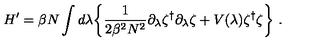

In [6]:
dataset[2]["image"]

In [7]:
dataset[2]["text"]

'H ^ { \\prime } = \\beta N \\int d \\lambda \\biggl \\{ \\frac { 1 } { 2 \\beta ^ { 2 } N ^ { 2 } } \\partial _ { \\lambda } \\zeta ^ { \\dagger } \\partial _ { \\lambda } \\zeta + V ( \\lambda ) \\zeta ^ { \\dagger } \\zeta \\biggr \\} \\ .'

我们还可以直接在浏览器中渲染乳胶！

In [8]:
from IPython.display import display, Math, Latex

latex = dataset[2]["text"]
display(Math(latex))

<IPython.core.display.Math object>

要格式化数据集，应将所有视觉填充任务的格式格式化如下：

```python
[
{ "role": "user",
  "content": [{"type": "text",  "text": Q}, {"type": "image", "image": image} ]
},
{ "role": "assistant",
  "content": [{"type": "text",  "text": A} ]
},
]
```

In [9]:
instruction = "Write the LaTeX representation for this image."

def convert_to_conversation(sample):
    conversation = [
        { "role": "user",
          "content" : [
            {"type" : "text",  "text"  : instruction},
            {"type" : "image", "image" : sample["image"]} ]
        },
        { "role" : "assistant",
          "content" : [
            {"type" : "text",  "text"  : sample["text"]} ]
        },
    ]
    return { "messages" : conversation }
pass

让我们将数据集转换为“正确”格式以进行登录：

In [10]:
converted_dataset = [convert_to_conversation(sample) for sample in dataset]

我们查看对话的结构是第一个示例：

In [11]:
converted_dataset[0]

{'messages': [{'role': 'user',
   'content': [{'type': 'text',
     'text': 'Write the LaTeX representation for this image.'},
    {'type': 'image',
     'image': <PIL.PngImagePlugin.PngImageFile image mode=RGB size=160x40>}]},
  {'role': 'assistant',
   'content': [{'type': 'text',
     'text': '{ \\frac { N } { M } } \\in { \\bf Z } , { \\frac { M } { P } } \\in { \\bf Z } , { \\frac { P } { Q } } \\in { \\bf Z }'}]}]}

让我们首先查看，然后再进行任何列出第一个示例的模型输出的内容！

In [12]:
FastVisionModel.for_inference(model) # 启用推理！

image = dataset[2]["image"]
instruction = "Write the LaTeX representation for this image."

messages = [
    {"role": "user", "content": [
        {"type": "image"},
        {"type": "text", "text": instruction}
    ]}
]
input_text = tokenizer.apply_chat_template(messages, add_generation_prompt = True)
inputs = tokenizer(
    image,
    input_text,
    add_special_tokens = False,
    return_tensors = "pt",
).to("cuda")

from transformers import TextStreamer
text_streamer = TextStreamer(tokenizer, skip_prompt = True)
_ = model.generate(**inputs, streamer = text_streamer, max_new_tokens = 128,
                   use_cache = True, temperature = 1.5, min_p = 0.1)

```latex
H' = \beta N \int d\lambda \left\{ \frac{1}{2\beta^2 N^2} \partial_\lambda \zeta^\dagger \partial_\lambda \zeta + V(\lambda) \zeta^\dagger \zeta \right\}.
```<|im_end|>


<a name =“ train”> </a>
###训练模型
现在，让我们使用huggingface trl的“ sfttrainer”！这里更多文档：[TRL SFT docs](https://huggingface.co/docs/trl/sft_trainer)。我们执行60个步骤来加快速度，但是您可以将`num_train_epochs = 1`设置为完整运行，然后关闭`max_steps = none“。我们还支持TRL的“ Dpotrainer”！

我们使用新的“ unsloshvisionDataCollator”，这将有助于我们的视觉填充设置。

In [ ]:
from unsloth.trainer import UnslothVisionDataCollator
from trl import SFTTrainer, SFTConfig

FastVisionModel.for_training(model) # 启用培训！

trainer = SFTTrainer(
    model = model,
    tokenizer = tokenizer,
    data_collator = UnslothVisionDataCollator(model, tokenizer), # 必须使用！
    train_dataset = converted_dataset,
    args = SFTConfig(
        per_device_train_batch_size = 2,
        gradient_accumulation_steps = 4,
        warmup_steps = 5,
        max_steps = 30,
        # num_train_epochs = 1，＃设置此而不是max_steps进行全面训练
        learning_rate = 2e-4,
        logging_steps = 1,
        optim = "adamw_8bit",
        weight_decay = 0.01,
        lr_scheduler_type = "linear",
        seed = 3407,
        output_dir = "outputs",
        report_to = "none",     # 重量和偏见

        # 您必须将以下项目进行视觉登录：
        remove_unused_columns = False,
        dataset_text_field = "",
        dataset_kwargs = {"skip_prepare_dataset": True},
        max_length = 2048,
    ),
)

Unsloth: Model does not have a default image size - using 512


In [14]:
# @Title显示当前内存统计
gpu_stats = torch.cuda.get_device_properties(0)
start_gpu_memory = round(torch.cuda.max_memory_reserved() / 1024 / 1024 / 1024, 3)
max_memory = round(gpu_stats.total_memory / 1024 / 1024 / 1024, 3)
print(f"GPU = {gpu_stats.name}. Max memory = {max_memory} GB.")
print(f"{start_gpu_memory} GB of memory reserved.")

GPU = Tesla T4. Max memory = 14.741 GB.
6.068 GB of memory reserved.


In [15]:
trainer_stats = trainer.train()

==((====))==  Unsloth - 2x faster free finetuning | Num GPUs used = 1
   \\   /|    Num examples = 68,686 | Num Epochs = 1 | Total steps = 30
O^O/ \_/ \    Batch size per device = 2 | Gradient accumulation steps = 4
\        /    Data Parallel GPUs = 1 | Total batch size (2 x 4 x 1) = 8
 "-____-"     Trainable parameters = 51,521,536/7,000,000,000 (0.74% trained)
`use_cache=True` is incompatible with gradient checkpointing. Setting `use_cache=False`...


Unsloth: Will smartly offload gradients to save VRAM!


In [16]:
# @Title显示最终内存和时间统计
used_memory = round(torch.cuda.max_memory_reserved() / 1024 / 1024 / 1024, 3)
used_memory_for_lora = round(used_memory - start_gpu_memory, 3)
used_percentage = round(used_memory / max_memory * 100, 3)
lora_percentage = round(used_memory_for_lora / max_memory * 100, 3)
print(f"{trainer_stats.metrics['train_runtime']} seconds used for training.")
print(
    f"{round(trainer_stats.metrics['train_runtime']/60, 2)} minutes used for training."
)
print(f"Peak reserved memory = {used_memory} GB.")
print(f"Peak reserved memory for training = {used_memory_for_lora} GB.")
print(f"Peak reserved memory % of max memory = {used_percentage} %.")
print(f"Peak reserved memory for training % of max memory = {lora_percentage} %.")

219.9988 seconds used for training.
3.67 minutes used for training.
Peak reserved memory = 6.484 GB.
Peak reserved memory for training = 0.416 GB.
Peak reserved memory % of max memory = 43.986 %.
Peak reserved memory for training % of max memory = 2.822 %.


<a name =“推理”> </a>
###推理
让我们运行模型！您可以更改指令和输入 - 将输出空白保留！

我们使用`min_p = 0.1`和`温度= 1.5`。阅读此xx_markDown_link_xx，以获取有关原因的更多信息。

In [17]:
FastVisionModel.for_inference(model) # 启用推理！

image = dataset[2]["image"]
instruction = "Write the LaTeX representation for this image."

messages = [
    {"role": "user", "content": [
        {"type": "image"},
        {"type": "text", "text": instruction}
    ]}
]
input_text = tokenizer.apply_chat_template(messages, add_generation_prompt = True)
inputs = tokenizer(
    image,
    input_text,
    add_special_tokens = False,
    return_tensors = "pt",
).to("cuda")

from transformers import TextStreamer
text_streamer = TextStreamer(tokenizer, skip_prompt = True)
_ = model.generate(**inputs, streamer = text_streamer, max_new_tokens = 128,
                   use_cache = True, temperature = 1.5, min_p = 0.1)

H ^ { \prime } = \beta N \int d \lambda \left\{ \frac { 1 } { 2 \beta ^ { 2 } \bar { N } ^ { 2 } } \partial _ { \lambda } \zeta ^ { \dagger } \partial _ { \lambda } \zeta + V ( \lambda ) \zeta ^ { \dagger } \zeta \right\} .<|im_end|>


<a name =“ save”> </a>
###保存，加载固定模型
要将最终模型保存为Lora适配器，请使用HuggingFace的“ push_to_hub”进行在线保存或`save_pretaining'用于本地保存。

** [注意] **这仅保存洛拉适配器，而不是完整的模型。要节省16位或GGUF，请向下滚动！

In [18]:
model.save_pretrained("lora_model")  # 本地节省
tokenizer.save_pretrained("lora_model")
# model.push_to_hub（“ your_name/lora_model”，token =“ ...”）＃在线保存
# tokenizer.push_to_hub（“ your_name/lora_model”，token =“ ...”）＃在线保存

[]

现在，如果您想加载洛拉适配器，我们刚刚保存用于推理，请将`false``设置为true`：：true'：

In [19]:
if False:
    from unsloth import FastVisionModel
    model, tokenizer = FastVisionModel.from_pretrained(
        model_name = "lora_model", # 您用于培训的模型
        load_in_4bit = True, # 设置为16位洛拉的假
    )
    FastVisionModel.for_inference(model) # 启用推理！

image = dataset[0]["image"]
instruction = "Write the LaTeX representation for this image."

messages = [
    {"role": "user", "content": [
        {"type": "image"},
        {"type": "text", "text": instruction}
    ]}
]
input_text = tokenizer.apply_chat_template(messages, add_generation_prompt = True)
inputs = tokenizer(
    image,
    input_text,
    add_special_tokens = False,
    return_tensors = "pt",
).to("cuda")

from transformers import TextStreamer
text_streamer = TextStreamer(tokenizer, skip_prompt = True)
_ = model.generate(**inputs, streamer = text_streamer, max_new_tokens = 128,
                   use_cache = True, temperature = 1.5, min_p = 0.1)

\frac { N } { M } \in \mathbf { Z } , \frac { P } { Q } \in \mathbf { Z } , P \in \mathbf { Z }<|im_end|>


### 节省float16 vllm

我们还直接支持保存到`float16`。为float16选择“合并_16bit”。使用`push_to_hub_merged`上传到您的拥抱脸部帐户！您可以访问https://huggingface.co/settings/tokens for个人令牌。

In [20]:
# 仅选择1个要保存！ （两者都不需要！）

# 在本地保存至16位
if False: model.save_pretrained_merged("unsloth_finetune", tokenizer,)

# 出口并保存到您的拥抱脸部帐户
if False: model.push_to_hub_merged("YOUR_USERNAME/unsloth_finetune", tokenizer, token = "PUT_HERE")

我们完成了！如果您对不舒服有任何疑问，我们有一个XX_MarkDown_link_xx频道！如果您发现任何错误或想对最新的LLM内容进行更新，或者需要帮助，加入项目等，请随时加入我们的不和谐！

其他一些链接：
1。训练您自己的推理模型-Llama grpo笔记本XX_Markdown_link_xx-grpo.ipynb）
2。将芬太尼保存到奥尔马。 [Discord](https://discord.gg/u54VK8m8tk)-ollama.ipynb）
3。Llama3.2视觉燃烧 -  X射线照相用例。 [Free Colab](https://colab.research.google.com/github/unslothai/notebooks/blob/main/nb/Llama3.1_(8B)-vision.ipynb）
6。请参见DPO，ORPO，继续预处理，对话finetuning等笔记本，以及我们的xx_markDown_link_xx上的更多内容！

<div class =“ Align-Center”>
  <a href =“ https://unsloth.ai”> <img src =“ https://github.com/unslothai/unslothai/unsloth/raw/raw/main/main/images/unsloth%20new%20new%20logo.png”
  <a href =“ https://discord.gg/unsloth”> <img src =“ https://github.com/unslothai/unsloth/unsloth/raw/main/main/main/images/images/discord.png，png
  <a href =“ https://docs.unsloth.ai/”> <img src =“ https://github.com/unslothai/unslothai/unsloth/unsloth/main/main/main/images/images/images/documentation%20green%20green%20breen%20button.png?png?png?raw=true width =”

  如果您需要帮助，请加入DISCORD +⭐️<i>在<a href =“ https://github.com/unslothai/unsloth上”
</div>
我们完成了！如果您对不舒服有任何疑问，我们有一个XX_MarkDown_link_xx频道！如果您发现任何错误或想对最新的LLM内容进行更新，或者需要帮助，加入项目等，请随时加入我们的不和谐！

其他一些链接：
1。训练您自己的推理模型-Llama grpo笔记本XX_Markdown_link_xx-grpo.ipynb）
2。将芬太尼保存到奥尔马。 [Free notebook](https://colab.research.google.com/github/unslothai/notebooks/blob/main/nb/Llama3_(8B)-ollama.ipynb）
3。Llama3.2视觉燃烧 -  X射线照相用例。 [Free Colab](https://colab.research.google.com/github/unslothai/notebooks/blob/main/nb/Llama3.2_(11B)-vision.ipynb）
6。请参见DPO，ORPO，继续预处理，对话finetuning等笔记本，以及我们的xx_markDown_link_xx上的更多内容！

<div class =“ Align-Center”>
  <a href =“ https://unsloth.ai”> <img src =“ https://github.com/unslothai/unslothai/unsloth/raw/raw/main/main/images/unsloth%20new%20new%20logo.png”
  <a href =“ https://discord.gg/unsloth”> <img src =“ https://github.com/unslothai/unsloth/unsloth/raw/main/main/main/images/images/discord.png，png
  <a href =“ https://docs.unsloth.ai/”> <img src =“ https://github.com/unslothai/unslothai/unsloth/unsloth/main/main/main/images/images/images/documentation%20green%20green%20breen%20button.png?png?png?raw=true width =”

  如果您需要帮助，请加入DISCORD +⭐️<i>在<a href =“ https://github.com/unslothai/unsloth上”
</div>
